In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import dump_svmlight_file
# from pyemma import msm
%matplotlib inline
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/training_set_VU_DM.csv", sep = ',')
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


Data cleaning:
Removing null and nan in competition details to lowest val 0

In [0]:
loc_q = df.groupby("prop_country_id")["prop_location_score2"].quantile(q=0.25)

In [0]:
print(loc_q)

prop_country_id
1      0.06980
2      0.02600
4      0.01920
7      0.10175
9      0.05110
        ...   
224    0.05610
225    0.01300
226    0.08040
229    0.06410
230    0.02510
Name: prop_location_score2, Length: 172, dtype: float64


In [0]:
df["prop_location_score2_quartile"] = loc_q.reindex([df.prop_id]).values
df["prop_location_score2"].fillna(df["prop_location_score2_quartile"])

0          0.0438
1          0.0149
2          0.0245
3          0.0125
4          0.1241
            ...  
4958342    0.0471
4958343    0.1520
4958344    0.0164
4958345    0.0662
4958346       NaN
Name: prop_location_score2, Length: 4958347, dtype: float64

In [0]:
df["comp1_rate"].describe()

count    119930.000000
mean          0.479788
std           0.641565
min          -1.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: comp1_rate, dtype: float64

In [0]:
df.fillna(-1, inplace=True)

In [0]:
numeric_features = ["prop_starrating", "prop_review_score", "prop_location_score1", "prop_location_score2"]

for label in numeric_features:
    mean = df.groupby("prop_id")[label].mean().fillna(value=-1)
    print(mean)
    median = df.groupby("prop_id")[label].median().fillna(value=-1)
    print(median)
    std = df.groupby("prop_id")[label].std().fillna(value=-1)
    print(std)
    df[label + "_mean"] = mean[df.prop_id].values
    df[label + "_median"] = median[df.prop_id].values
    df[label + "_std"] = std[df.prop_id].values

prop_id
1         2
2         0
3         3
4         5
5         0
         ..
140817    2
140818    3
140819    3
140820    4
140821    4
Name: prop_starrating, Length: 129113, dtype: int64
prop_id
1         2
2         0
3         3
4         5
5         0
         ..
140817    2
140818    3
140819    3
140820    4
140821    4
Name: prop_starrating, Length: 129113, dtype: int64
prop_id
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
         ... 
140817    0.0
140818    0.0
140819    0.0
140820    0.0
140821    0.0
Name: prop_starrating, Length: 129113, dtype: float64
prop_id
1         0.0
2         4.0
3         3.5
4         4.5
5         0.0
         ... 
140817    3.0
140818    0.0
140819    4.0
140820    0.0
140821    5.0
Name: prop_review_score, Length: 129113, dtype: float64
prop_id
1         0.0
2         4.0
3         3.5
4         4.5
5         0.0
         ... 
140817    3.0
140818    0.0
140819    4.0
140820    0.0
140821    5.0
Name: prop_review_sc

In [0]:
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,prop_location_score2_quartile,prop_starrating_mean,prop_starrating_median,prop_starrating_std,prop_review_score_mean,prop_review_score_median,prop_review_score_std,prop_location_score1_mean,prop_location_score1_median,prop_location_score1_std,prop_location_score2_mean,prop_location_score2_median,prop_location_score2_std
0,1,2013-04-04 08:32:15,12,187,-1.0,-1.0,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,-1.0,-1.0,1,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0,-1.0,0,-1.0,3,3,0.0,3.5,3.5,0.0,2.83,2.83,0.0,0.013029,0.0438,0.211287
1,1,2013-04-04 08:32:15,12,187,-1.0,-1.0,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,-1.0,-1.0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0,-1.0,0,-1.0,4,4,0.0,4.0,4.0,0.0,2.20,2.20,0.0,-0.035759,0.0149,0.245842
2,1,2013-04-04 08:32:15,12,187,-1.0,-1.0,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,-1.0,-1.0,1,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0,-1.0,0,-1.0,3,3,0.0,4.5,4.5,0.0,2.20,2.20,0.0,-0.038359,0.0245,0.276993
3,1,2013-04-04 08:32:15,12,187,-1.0,-1.0,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,-1.0,-1.0,1,-1.0,-1.0,-1.0,-1.0,0.0,5.0,-1.0,0.0,5.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,5.0,0,-1.0,0,-1.0,2,2,0.0,4.0,4.0,0.0,2.83,2.83,0.0,0.000378,0.0125,0.150556
4,1,2013-04-04 08:32:15,12,187,-1.0,-1.0,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,-1.0,-1.0,1,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0,-1.0,0,-1.0,4,4,0.0,3.5,3.5,0.0,2.64,2.64,0.0,0.051091,0.1241,0.318814


In [0]:
feature_labels = df.columns.values.tolist()
remove = []
for i in range(1,9):
  remove += ["comp%d_rate" % i, "comp%d_inv" % i, "comp%d_rate_percent_diff" % i]
remove += ["srch_query_affinity_score","visitor_hist_adr_usd","visitor_hist_starrating"]

print(feature_labels)
remove += ["position","click_bool","booking_bool","gross_bookings_usd","srch_id","prop_id"]
for label in remove:
  print(label)
  feature_labels.remove(label)

['srch_id', 'date_time', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'click_b

In [0]:
#Remove price_usd outliers > 10000 (Does not make sense) 
df = df[df["price_usd"] < 10000]

In [0]:
df.count()

srch_id                        4956353
date_time                      4956353
site_id                        4956353
visitor_location_country_id    4956353
visitor_hist_starrating        4956353
                                ...   
prop_location_score1_median    4956353
prop_location_score1_std       4956353
prop_location_score2_mean      4956353
prop_location_score2_median    4956353
prop_location_score2_std       4956353
Length: 67, dtype: int64

In [0]:
df["count_window"] = df["srch_room_count"] * max(df["srch_booking_window"]) + df["srch_booking_window"]
feature_labels.append("count_window")

In [0]:
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,prop_location_score2_quartile,prop_starrating_mean,prop_starrating_median,prop_starrating_std,prop_review_score_mean,prop_review_score_median,prop_review_score_std,prop_location_score1_mean,prop_location_score1_median,prop_location_score1_std,prop_location_score2_mean,prop_location_score2_median,prop_location_score2_std,count_window
0,1,2013-04-04 08:32:15,12,187,-1.0,-1.0,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,-1.0,-1.0,1,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0,-1.0,0,-1.0,3,3,0.0,3.5,3.5,0.0,2.83,2.83,0.0,0.013029,0.0438,0.211287,492
1,1,2013-04-04 08:32:15,12,187,-1.0,-1.0,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,-1.0,-1.0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0,-1.0,0,-1.0,4,4,0.0,4.0,4.0,0.0,2.20,2.20,0.0,-0.035759,0.0149,0.245842,492
2,1,2013-04-04 08:32:15,12,187,-1.0,-1.0,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,-1.0,-1.0,1,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0,-1.0,0,-1.0,3,3,0.0,4.5,4.5,0.0,2.20,2.20,0.0,-0.038359,0.0245,0.276993,492
3,1,2013-04-04 08:32:15,12,187,-1.0,-1.0,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,-1.0,-1.0,1,-1.0,-1.0,-1.0,-1.0,0.0,5.0,-1.0,0.0,5.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,5.0,0,-1.0,0,-1.0,2,2,0.0,4.0,4.0,0.0,2.83,2.83,0.0,0.000378,0.0125,0.150556,492
4,1,2013-04-04 08:32:15,12,187,-1.0,-1.0,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,-1.0,-1.0,1,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0,-1.0,0,-1.0,4,4,0.0,3.5,3.5,0.0,2.64,2.64,0.0,0.051091,0.1241,0.318814,492


In [0]:
df_datetime = pd.DatetimeIndex(df.date_time)
df["month"] = df_datetime.month
df["week"] = df_datetime.week
df["day"] = df_datetime.dayofweek + 1
df["hour"] = df_datetime.hour
feature_labels += ["month", "week", "day", "hour"]
feature_labels.remove("date_time")

In [0]:
df["prop_historical_price"] = (np.e ** df["prop_log_historical_price"]).replace(1.0, 10000)
feature_labels.append("prop_historical_price")
feature_labels.remove("prop_log_historical_price")

In [0]:
target = np.fmax((df["booking_bool"]*5).values, df["click_bool"].values)

In [0]:
print(feature_labels)

['site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool', 'prop_location_score2_quartile', 'prop_starrating_mean', 'prop_starrating_median', 'prop_starrating_std', 'prop_review_score_mean', 'prop_review_score_median', 'prop_review_score_std', 'prop_location_score1_mean', 'prop_location_score1_median', 'prop_location_score1_std', 'prop_location_score2_mean', 'prop_location_score2_median', 'prop_location_score2_std', 'count_window', 'month', 'week', 'day', 'hour', 'prop_historical_price']


In [0]:
comment = ' '.join(map(lambda t: '%d:%s' % t, zip(range(len(feature_labels)), feature_labels)))

In [0]:
print(comment)

0:site_id 1:visitor_location_country_id 2:prop_country_id 3:prop_starrating 4:prop_review_score 5:prop_brand_bool 6:prop_location_score1 7:prop_location_score2 8:price_usd 9:promotion_flag 10:srch_destination_id 11:srch_length_of_stay 12:srch_booking_window 13:srch_adults_count 14:srch_children_count 15:srch_room_count 16:srch_saturday_night_bool 17:orig_destination_distance 18:random_bool 19:prop_location_score2_quartile 20:prop_starrating_mean 21:prop_starrating_median 22:prop_starrating_std 23:prop_review_score_mean 24:prop_review_score_median 25:prop_review_score_std 26:prop_location_score1_mean 27:prop_location_score1_median 28:prop_location_score1_std 29:prop_location_score2_mean 30:prop_location_score2_median 31:prop_location_score2_std 32:count_window 33:month 34:week 35:day 36:hour 37:prop_historical_price


In [0]:
dump_svmlight_file(df[feature_labels].values, target, '/content/drive/My Drive/Colab Notebooks/train.svmlight', zero_based=False, comment=comment, query_id=df["srch_id"].values)

In [0]:
validation = df.sample(221879)

In [0]:
target_validation = np.fmax((validation["booking_bool"]*5).values, validation["click_bool"].values)

In [0]:
dump_svmlight_file(validation[feature_labels].values, target_validation, '/content/drive/My Drive/Colab Notebooks/validation.svmlight', zero_based=False, comment=comment, query_id=validation["srch_id"].values)

In [0]:
df[df.target == 1].head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,prop_location_score2_quartile,prop_starrating_mean,prop_starrating_median,prop_starrating_std,prop_review_score_mean,prop_review_score_median,prop_review_score_std,prop_location_score1_mean,prop_location_score1_median,prop_location_score1_std,prop_location_score2_mean,prop_location_score2_median,prop_location_score2_std,count_window,month,week,day,hour,prop_historical_price,target
59,4,2012-12-31 08:59:22,5,219,-1.0,-1.0,219,139893,2,3.0,1,1.61,0.0309,5.25,16,129.00,0,12588,2,46,1,0,1,1,-1.0,236.14,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,-1.0,0,-1.0,2,2,0.0,3.0,3.0,0.0,1.61,1.61,0.0,-0.073326,0.0309,0.300809,538,12,1,1,8,190.566268,1
90,11,2013-02-25 08:39:33,5,219,-1.0,-1.0,219,20499,2,3.5,1,2.20,-1.0000,4.11,31,45.00,0,12610,1,39,2,0,1,1,-1.0,284.67,1,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,1,-1.0,0,-1.0,2,2,0.0,3.5,3.5,0.0,2.20,2.20,0.0,-0.376886,0.0038,0.579395,531,2,9,1,8,60.946718,1
145,12,2013-03-15 14:55:16,5,219,-1.0,-1.0,158,129310,3,3.5,0,0.00,0.0476,3.75,1,27.00,0,26648,2,21,3,0,1,1,-1.0,9283.62,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,-1.0,0,-1.0,3,3,0.0,3.5,3.5,0.0,0.00,0.00,0.0,-0.691185,-1.0000,0.484043,513,3,11,5,14,42.521082,1
168,17,2012-11-05 19:52:18,18,129,-1.0,-1.0,31,87596,3,2.5,0,6.91,0.7270,5.07,28,182.98,0,6285,4,194,4,1,2,1,-1.0,433.87,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,-1.0,0,-1.0,3,3,0.0,2.5,2.5,0.0,6.91,6.91,0.0,0.544103,0.7270,0.359458,1178,11,45,1,19,159.174327,1
319,31,2013-05-28 22:05:02,24,216,-1.0,-1.0,15,6764,2,3.5,1,1.61,0.0148,4.91,4,101.23,0,19144,1,214,2,2,1,1,-1.0,-1.00,1,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1,-1.0,0,-1.0,2,2,0.0,3.5,3.5,0.0,1.61,1.61,0.0,0.064148,0.0974,0.041615,706,5,22,2,22,135.639414,1


In [0]:
df["target"] = np.fmax((df["booking_bool"]*5), df["click_bool"])

In [0]:
df.to_csv("/content/drive/My Drive/Colab Notebooks/train_main.csv")

In [0]:
df["comp1_rate"].fillna(0.0, inplace = True)
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,0.0,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [0]:
df["comp1_rate"].describe()

count    4.958347e+06
mean     1.160488e-02
std      1.240518e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: comp1_rate, dtype: float64

In [0]:
df["comp1_inv"].describe()

count    129559.000000
mean          0.031059
std           0.229688
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: comp1_inv, dtype: float64

In [0]:
df["comp1_inv"].fillna(0.0, inplace = True)
df["comp1_rate_percent_diff"].fillna(0.0, inplace = True)
df["comp2_rate"].fillna(0.0, inplace = True)
df["comp2_inv"].fillna(0.0, inplace = True)
df["comp2_rate_percent_diff"].fillna(0.0, inplace = True)
df["comp3_rate"].fillna(0.0, inplace = True)
df["comp3_inv"].fillna(0.0, inplace = True)
df["comp3_rate_percent_diff"].fillna(0.0, inplace = True)
df["comp4_rate"].fillna(0.0, inplace = True)
df["comp4_inv"].fillna(0.0, inplace = True)
df["comp4_rate_percent_diff"].fillna(0.0, inplace = True)
df["comp5_rate"].fillna(0.0, inplace = True)
df["comp5_inv"].fillna(0.0, inplace = True)
df["comp5_rate_percent_diff"].fillna(0.0, inplace = True)
df["comp6_rate"].fillna(0.0, inplace = True)
df["comp6_inv"].fillna(0.0, inplace = True)
df["comp6_rate_percent_diff"].fillna(0.0, inplace = True)
df["comp7_rate"].fillna(0.0, inplace = True)
df["comp7_inv"].fillna(0.0, inplace = True)
df["comp7_rate_percent_diff"].fillna(0.0, inplace = True)
df["comp8_rate"].fillna(0.0, inplace = True)
df["comp8_inv"].fillna(0.0, inplace = True)
df["comp8_rate_percent_diff"].fillna(0.0, inplace = True)
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0


In [0]:
#df.price_usd.corr(df.gross_bookings_usd)

0.007575328286871024

In [0]:
df["orig_destination_distance"].describe()

count    3.350565e+06
mean     1.301234e+03
std      2.023951e+03
min      1.000000e-02
25%      1.398000e+02
50%      3.866000e+02
75%      1.500670e+03
max      1.166664e+04
Name: orig_destination_distance, dtype: float64

In [0]:
df["orig_destination_distance"].fillna(df["orig_destination_distance"].median(), inplace = True)
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0


In [0]:
df["srch_query_affinity_score"].describe()

count    317406.000000
mean        -24.146418
std          15.743238
min        -326.567500
25%         -30.774775
50%         -20.451300
75%         -13.350625
max          -2.494100
Name: srch_query_affinity_score, dtype: float64

In [0]:
df["srch_query_affinity_score"].fillna(0.0, inplace = True)

In [0]:
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0


In [0]:
df["prop_review_score"].describe()

count    4.950983e+06
mean     3.777777e+00
std      1.050329e+00
min      0.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.500000e+00
max      5.000000e+00
Name: prop_review_score, dtype: float64

In [0]:
df["prop_review_score"].fillna(df["prop_review_score"].median(), inplace = True)
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0


In [0]:
df["prop_location_score2"].isnull().sum()

1090348

In [0]:
df["prop_location_score2"].describe()

count    3.867999e+06
mean     1.303852e-01
std      1.594634e-01
min      0.000000e+00
25%      1.900000e-02
50%      6.900000e-02
75%      1.805000e-01
max      1.000000e+00
Name: prop_location_score2, dtype: float64

In [0]:
df["prop_location_score2"].fillna(df["prop_location_score2"].min(), inplace = True)
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0


In [0]:
df["visitor_hist_starrating"].fillna(df["visitor_hist_starrating"].median(), inplace = True)

In [0]:
df["visitor_hist_adr_usd"].fillna(df["visitor_hist_adr_usd"].median(), inplace = True)

Outlier Removals:

In [0]:
df["prop_starrating"].describe()

count    4.958347e+06
mean     3.180525e+00
std      1.051024e+00
min      0.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: prop_starrating, dtype: float64

In [0]:
df[(df.price_usd <= 0) & (df.gross_bookings_usd > 0)].head(10)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
1436126,96300,2013-06-05 20:11:36,6,202,3.45,152.24,164,78242,3,4.5,0,5.02,0.3694,0.00,30,0.0,1,12902,1,22,2,1,1,1,0.0,386.6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,56.75,1
3564068,239365,2012-11-18 20:32:24,33,164,3.45,152.24,164,132433,2,4.0,0,3.85,0.0978,3.46,34,0.0,1,17232,2,1,2,0,1,0,0.0,386.6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,54.40,1


Text(0, 0.5, 'Density')

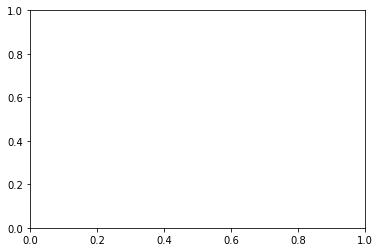

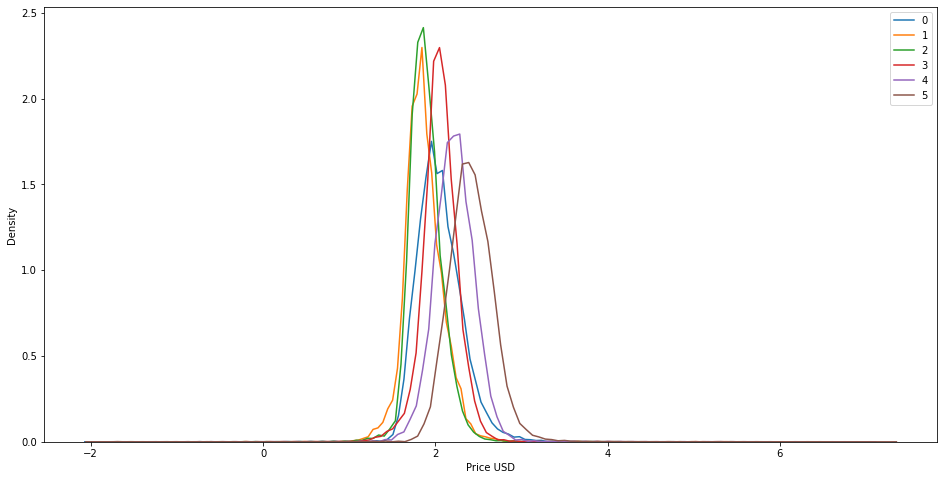

In [0]:
%matplotlib inline
# Initialize figure and ax
fig, ax = plt.subplots()
plt.figure(figsize=(16,8))
# this is to plot the kde
sns.kdeplot(np.log10(df.price_usd[(df.prop_starrating == 0.0) & (df.price_usd > 0)]),label='0');
sns.kdeplot(np.log10(df.price_usd[(df.prop_starrating == 1.0) & (df.price_usd > 0)]),label='1');
sns.kdeplot(np.log10(df.price_usd[(df.prop_starrating == 2.0) & (df.price_usd > 0)]),label='2');
sns.kdeplot(np.log10(df.price_usd[(df.prop_starrating == 3.0) & (df.price_usd > 0)]),label='3');
sns.kdeplot(np.log10(df.price_usd[(df.prop_starrating == 4.0) & (df.price_usd > 0)]),label='4');
sns.kdeplot(np.log10(df.price_usd[(df.prop_starrating == 5.0) & (df.price_usd > 0)]),label='5');

# beautifying the labels
plt.xlabel('Price USD')
plt.ylabel('Density')


In [0]:
df["gross_bookings_usd"].fillna(0.0, inplace = True)

In [0]:
df.isnull().sum()

srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
visitor_hist_starrating        0
visitor_hist_adr_usd           0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
srch_query_affinity_score      0
orig_destination_distance      0
random_bool                    0
comp1_rate                     0
comp1_inv                      0
comp1_rate_percent_diff        0
comp2_rate

In [0]:
# ct = df.corr().abs().max().sort_values(ascending=False)
# display(ct[((ct > 0.7) & (ct <= 1)) | ((ct < -0.7) & (ct > -1))])

In [0]:
df[df.booking_bool == 1]["prop_starrating"].mean()

3.3120601199508637

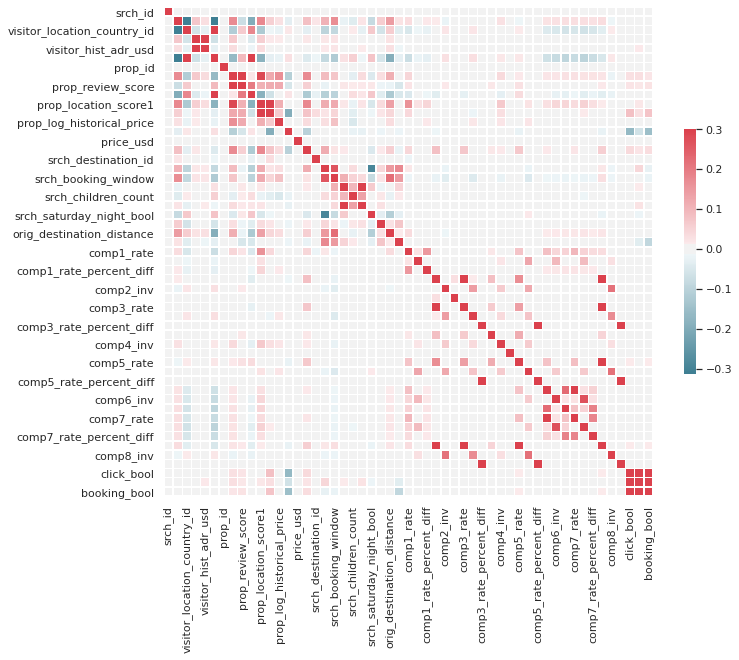

In [0]:
corr = df.corr(method ='pearson')
sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Feature Engineering:

In [0]:
df = df.drop_duplicates()

In [0]:
# Difference between visitor's payment record and hotel's current price:
df['histpricediff'] = (df["visitor_hist_adr_usd"] - df["price_usd"])
df.head(5)
#df['price_usd'].describe()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66


In [0]:
df["histstardiff"] = (df["visitor_hist_starrating"] - df["prop_starrating"])
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55


In [0]:
# mea = df.groupby(df.srch_id)["price_usd"].mean()
# display(mea)
# mea.get(11)
#df["pricediff"] = (df["price_usd"] - mea.get(df["srch_id"]))
#df.head(5)
means = df.groupby(df.srch_id)["price_usd"].transform('mean')
df["pricediff"] = df["price_usd"] - means
means.drop(means.index, inplace=True)
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929


In [0]:
means = df.groupby(df.srch_id)["prop_starrating"].transform('mean')
df["stardiff"] = df["prop_starrating"] - means
means.drop(means.index, inplace=True)
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571


In [0]:
means = df.groupby(df.srch_id)["prop_review_score"].transform('mean')
df["reviewscorediff"] = df["prop_review_score"] - means
means.drop(means.index, inplace=True)
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857


In [0]:
means = df.groupby(df.srch_id)["prop_location_score1"].transform('mean')
df["locationscore1diff"] = df["prop_location_score1"] - means
means.drop(means.index, inplace=True)
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357


In [0]:
means = df.groupby(df.srch_id)["prop_location_score2"].transform('mean')
df["locationscore2diff"] = df["prop_location_score2"] - means
means.drop(means.index, inplace=True)
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357,-0.001693
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643,-0.030593
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643,-0.020993
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357,-0.032993
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357,0.078607


In [0]:
df = df.sort_values(by=["prop_id","date_time","srch_id"])
df.head(20)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff
4335788,290885,2012-11-04 07:03:31,5,219,3.45,152.24,219,1,2,0.0,1,3.04,0.0,4.30,21,89.0,0,14215,1,5,2,0,1,1,0.0000,1054.72,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,63.24,1.45,-0.030303,-0.363636,-3.893939,0.781515,-0.098579
2579011,173183,2012-11-06 08:58:26,5,219,3.45,152.24,219,1,2,0.0,1,3.04,0.0,4.33,38,89.0,0,6475,1,10,2,0,1,1,0.0000,386.60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,63.24,1.45,2.588235,-0.588235,-3.852941,0.956471,-0.068600
3728222,250387,2012-11-08 04:09:33,5,219,3.45,152.24,219,1,2,0.0,1,3.04,0.0,4.33,36,99.0,0,6475,5,8,2,0,1,0,0.0000,51.12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,53.24,1.45,18.515152,-0.575758,-3.848485,0.947576,-0.067585
2665876,178899,2012-11-09 12:49:16,5,219,3.45,152.24,219,1,2,0.0,1,3.04,0.0,4.33,35,99.0,0,6475,1,4,2,0,2,0,0.0000,1378.47,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,53.24,1.45,6.967742,-0.612903,-3.854839,0.985484,-0.072177
122212,8178,2012-11-17 08:14:07,5,219,3.45,152.24,219,1,2,0.0,1,3.04,0.0,4.30,34,89.0,0,6475,1,0,2,0,1,1,0.0000,386.60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,63.24,1.45,-10.787879,-0.454545,-3.909091,0.828788,-0.066139
3375538,226748,2012-11-26 21:21:37,5,219,3.45,152.24,219,1,2,0.0,1,3.04,0.0,4.33,30,89.0,0,6475,1,5,2,0,1,1,0.0000,386.60,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,63.24,1.45,-4.545455,-0.515152,-3.893939,1.012424,-0.069430
752775,50330,2012-11-30 11:01:44,5,219,3.45,152.24,219,1,2,0.0,1,3.04,0.0,4.33,32,89.0,0,16037,1,1,2,0,1,1,0.0000,967.16,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,63.24,1.45,-1.735294,-0.294118,-3.735294,0.883529,-0.054850
578605,38661,2012-12-02 12:01:16,5,219,2.04,80.24,219,1,2,0.0,1,3.04,0.0,4.33,34,99.0,0,6475,1,2,1,0,1,0,0.0000,386.60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.76,0.04,10.696970,-0.424242,-3.848485,0.931515,-0.065509
4772218,320180,2012-12-05 13:46:23,5,219,3.45,152.24,219,1,2,0.0,1,3.04,0.0,4.33,35,89.0,0,6475,1,2,1,0,1,1,0.0000,386.60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,63.24,1.45,1.272727,-0.606061,-3.878788,0.926667,-0.070070
3529272,236926,2012-12-05 19:21:59,5,219,3.45,152.24,219,1,2,0.0,1,3.04,0.0,4.33,19,89.0,0,6475,1,3,4,0,2,1,0.0000,76.11,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,63.24,1.45,0.161290,-0.612903,-3.919355,0.924516,-0.065684


In [0]:
# df['pricechange'] = df.price_usd.pct_change(periods=1)
# df.head(5)

In [0]:
df['pricechange'] = df.groupby(['prop_id']).price_usd.pct_change()
df[df.prop_id == 4].head(50)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange
2217726,148919,2012-12-23 13:57:15,32,220,3.45,152.24,109,4,5,4.5,1,4.88,0.0000,6.02,28,320.20,1,12631,5,155,2,0,1,0,0.0,386.60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,-167.96,-1.55,138.842069,0.965517,0.017241,-0.096897,-0.390134,NaN
5275,383,2013-01-24 13:44:19,5,106,3.45,152.24,109,4,5,4.5,1,4.88,0.1155,6.21,2,717.00,1,12420,5,167,2,2,1,0,0.0,386.60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3782.13,1,-564.76,-1.55,13.700000,0.000000,1.000000,0.878000,0.052040,1.239225
3486049,234070,2013-02-06 12:45:54,5,219,3.45,152.24,109,4,5,4.5,1,4.88,0.1155,6.13,13,515.00,1,12420,5,221,2,1,1,0,0.0,5029.25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,-362.76,-1.55,282.400000,1.400000,1.000000,0.513667,0.042587,-0.281729
4730596,317379,2013-02-06 12:47:00,24,216,3.45,152.24,109,4,5,4.5,1,4.88,0.1155,6.13,4,643.68,0,12420,3,186,2,0,1,0,0.0,386.60,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,-491.44,-1.55,153.367500,0.000000,0.520833,0.670417,0.050617,0.249864
2611910,175305,2013-02-10 20:59:24,12,99,3.45,152.24,109,4,5,4.5,1,4.88,0.0000,6.13,14,303.39,0,21531,3,117,2,0,1,1,0.0,386.60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,-151.15,-1.55,81.709310,1.137931,0.431034,0.213448,-0.478952,-0.528663
3015691,202458,2013-03-03 17:39:25,5,212,3.45,152.24,109,4,5,4.5,1,4.88,0.1155,6.09,9,394.00,0,12420,3,129,2,0,1,0,0.0,386.60,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,-241.76,-1.55,-65.791667,0.000000,0.520833,0.670417,0.050617,0.298658
3201199,214993,2013-03-05 22:06:58,15,55,3.45,152.24,109,4,5,4.5,1,4.88,0.1155,6.06,1,415.97,0,12420,6,209,2,0,1,0,0.0,386.60,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,-263.73,-1.55,73.221364,0.045455,0.795455,0.732727,0.052555,0.055761
738335,49409,2013-03-10 13:07:34,5,219,3.45,152.24,109,4,5,4.5,1,4.88,0.0000,6.06,14,369.00,0,21531,5,185,2,0,1,0,0.0,5580.08,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,-216.76,-1.55,16.413793,0.896552,1.344828,0.221379,-0.407421,-0.112917
2072790,139134,2013-03-22 15:23:26,4,50,3.45,152.24,109,4,5,4.5,1,4.88,0.0000,6.06,16,387.18,0,21531,2,103,2,1,1,0,0.0,386.60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,-234.94,-1.55,115.612069,1.206897,0.431034,0.212759,-0.477428,0.049268
1545570,103716,2013-04-05 14:03:10,32,220,3.45,152.24,109,4,5,4.5,1,4.88,0.0000,6.14,14,314.58,0,30,14,52,2,0,1,0,0.0,9419.73,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0,-162.34,-1.55,-143.113500,0.050000,1.175000

In [0]:
df["pricechange"].fillna(0.0, inplace = True)
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange
4335788,290885,2012-11-04 07:03:31,5,219,3.45,152.24,219,1,2,0.0,1,3.04,0.0,4.30,21,89.0,0,14215,1,5,2,0,1,1,0.0,1054.72,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,63.24,1.45,-0.030303,-0.363636,-3.893939,0.781515,-0.098579,0.00000
2579011,173183,2012-11-06 08:58:26,5,219,3.45,152.24,219,1,2,0.0,1,3.04,0.0,4.33,38,89.0,0,6475,1,10,2,0,1,1,0.0,386.60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,63.24,1.45,2.588235,-0.588235,-3.852941,0.956471,-0.068600,0.00000
3728222,250387,2012-11-08 04:09:33,5,219,3.45,152.24,219,1,2,0.0,1,3.04,0.0,4.33,36,99.0,0,6475,5,8,2,0,1,0,0.0,51.12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,53.24,1.45,18.515152,-0.575758,-3.848485,0.947576,-0.067585,0.11236
2665876,178899,2012-11-09 12:49:16,5,219,3.45,152.24,219,1,2,0.0,1,3.04,0.0,4.33,35,99.0,0,6475,1,4,2,0,2,0,0.0,1378.47,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,53.24,1.45,6.967742,-0.612903,-3.854839,0.985484,-0.072177,0.00000
122212,8178,2012-11-17 08:14:07,5,219,3.45,152.24,219,1,2,0.0,1,3.04,0.0,4.30,34,89.0,0,6475,1,0,2,0,1,1,0.0,386.60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,63.24,1.45,-10.787879,-0.454545,-3.909091,0.828788,-0.066139,-0.10101


In [0]:
df = df.sort_values(by=["srch_id","date_time"])
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357,-0.001693,-0.211426
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643,-0.030593,0.682499
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643,-0.020993,-0.050436
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357,-0.032993,9.475669
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357,0.078607,-0.002362


In [0]:
# df['pricediff'] = df.groupby(['prop_id']).price_usd.pct_change()
# df[df.prop_id == 4].head(50)
# df11=df.groupby('key1')['key2'].apply(lambda x: (x=='one').sum()).reset_index(name='count')
# print (df11)
ty = df.groupby("prop_id")["booking_bool","click_bool"].apply(lambda x: (x==1).sum()).reset_index()
ty.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,prop_id,booking_bool,click_bool
0,1,0,1
1,2,1,1
2,3,2,2
3,4,1,1
4,5,0,2


In [0]:
ty = ty.rename(columns={'booking_bool': 'booking_count', 'click_bool': 'click_count'})
ty.head(5)

,prop_id,booking_count,click_count
0,1,0,1
1,2,1,1
2,3,2,2
3,4,1,1
4,5,0,2


In [0]:
df['booking_count'] = df['prop_id'].map(ty.set_index('prop_id')['booking_count'])
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange,booking_count
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357,-0.001693,-0.211426,10
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643,-0.030593,0.682499,9
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643,-0.020993,-0.050436,2
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357,-0.032993,9.475669,6
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357,0.078607,-0.002362,24


In [0]:
ty[ty.prop_id == 893]

,prop_id,booking_count,click_count
824,893,10,16


In [0]:
df['click_count'] = df['prop_id'].map(ty.set_index('prop_id')['click_count'])
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange,booking_count,click_count
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357,-0.001693,-0.211426,10,16
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643,-0.030593,0.682499,9,15
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643,-0.020993,-0.050436,2,5
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357,-0.032993,9.475669,6,11
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357,0.078607,-0.002362,24,34


In [0]:
tz = df.groupby("prop_id")["srch_id"].agg("count").reset_index()
tz.head(5)

,prop_id,srch_id
0,1,61
1,2,11
2,3,82
3,4,22
4,5,30


In [0]:
df[df.prop_id == 893].count()

srch_id                        612
date_time                      612
site_id                        612
visitor_location_country_id    612
visitor_hist_starrating        612
                              ... 
locationscore1diff             612
locationscore2diff             612
pricechange                    612
booking_count                  612
click_count                    612
Length: 64, dtype: int64

In [0]:
# df['click_count'] = df['prop_id'].map(ty.set_index('prop_id')['click_count'])
# df.head(5)
df["hotel_count"] = df["prop_id"].map(tz.set_index("prop_id")["srch_id"])
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange,booking_count,click_count,hotel_count
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357,-0.001693,-0.211426,10,16,612
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643,-0.030593,0.682499,9,15,583
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643,-0.020993,-0.050436,2,5,551
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357,-0.032993,9.475669,6,11,460
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357,0.078607,-0.002362,24,34,665


In [0]:
df["popularity_score"] = (df["booking_count"]/df["click_count"])*df["hotel_count"]
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange,booking_count,click_count,hotel_count,popularity_score
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357,-0.001693,-0.211426,10,16,612,382.500000
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643,-0.030593,0.682499,9,15,583,349.800000
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643,-0.020993,-0.050436,2,5,551,220.400000
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357,-0.032993,9.475669,6,11,460,250.909091
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357,0.078607,-0.002362,24,34,665,469.411765


In [0]:
df["popularity_score"].fillna(df["popularity_score"].median(), inplace = True)

In [0]:
df["is219"] = (df["visitor_location_country_id"] == 291)

In [0]:
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange,booking_count,click_count,hotel_count,popularity_score,is219
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357,-0.001693,-0.211426,10,16,612,382.500000,False
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643,-0.030593,0.682499,9,15,583,349.800000,False
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643,-0.020993,-0.050436,2,5,551,220.400000,False
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357,-0.032993,9.475669,6,11,460,250.909091,False
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357,0.078607,-0.002362,24,34,665,469.411765,False


In [0]:
df["usd_diff"] = (df["visitor_hist_adr_usd"] - df["price_usd"]).abs() 

In [0]:
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange,booking_count,click_count,hotel_count,popularity_score,is219,usd_diff
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357,-0.001693,-0.211426,10,16,612,382.500000,False,47.47
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643,-0.030593,0.682499,9,15,583,349.800000,False,18.50
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643,-0.020993,-0.050436,2,5,551,220.400000,False,27.56
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357,-0.032993,9.475669,6,11,460,250.909091,False,450.53
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357,0.078607,-0.002362,24,34,665,469.411765,False,8.66


In [0]:
# Delete ty and tz
lst = [ty, tz]
del ty, tz # dfs still in list
del lst

In [0]:
df["prop_starrating_monotonic"] = (df["prop_starrating"] - 3.3120601199508637).abs()
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange,booking_count,click_count,hotel_count,popularity_score,is219,usd_diff,prop_starrating_monotonic
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357,-0.001693,-0.211426,10,16,612,382.500000,False,47.47,0.31206
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643,-0.030593,0.682499,9,15,583,349.800000,False,18.50,0.68794
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643,-0.020993,-0.050436,2,5,551,220.400000,False,27.56,0.31206
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357,-0.032993,9.475669,6,11,460,250.909091,False,450.53,1.31206
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357,0.078607,-0.002362,24,34,665,469.411765,False,8.66,0.68794


In [0]:
df["room_count_booking_window"] = df["srch_booking_window"]*df["srch_room_count"]
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange,booking_count,click_count,hotel_count,popularity_score,is219,usd_diff,prop_starrating_monotonic,room_count_booking_window
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357,-0.001693,-0.211426,10,16,612,382.500000,False,47.47,0.31206,0
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643,-0.030593,0.682499,9,15,583,349.800000,False,18.50,0.68794,0
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643,-0.020993,-0.050436,2,5,551,220.400000,False,27.56,0.31206,0
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357,-0.032993,9.475669,6,11,460,250.909091,False,450.53,1.31206,0
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357,0.078607,-0.002362,24,34,665,469.411765,False,8.66,0.68794,0


In [0]:
df["people_stay_count"] = df["srch_adults_count"] + df["srch_children_count"]

In [0]:
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange,booking_count,click_count,hotel_count,popularity_score,is219,usd_diff,prop_starrating_monotonic,room_count_booking_window,people_stay_count
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357,-0.001693,-0.211426,10,16,612,382.500000,False,47.47,0.31206,0,4
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643,-0.030593,0.682499,9,15,583,349.800000,False,18.50,0.68794,0,4
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643,-0.020993,-0.050436,2,5,551,220.400000,False,27.56,0.31206,0,4
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357,-0.032993,9.475669,6,11,460,250.909091,False,450.53,1.31206,0,4
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357,0.078607,-0.002362,24,34,665,469.411765,False,8.66,0.68794,0,4


In [0]:
#Normalize Price_USD (future work)

In [0]:
#Convert DateTime to months:
# df[df.date_time == '2013-04-04 08:32:15']
df['month'] = pd.DatetimeIndex(df['date_time']).month
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange,booking_count,click_count,hotel_count,popularity_score,is219,usd_diff,prop_starrating_monotonic,room_count_booking_window,people_stay_count,month
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357,-0.001693,-0.211426,10,16,612,382.500000,False,47.47,0.31206,0,4,4
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643,-0.030593,0.682499,9,15,583,349.800000,False,18.50,0.68794,0,4,4
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643,-0.020993,-0.050436,2,5,551,220.400000,False,27.56,0.31206,0,4,4
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357,-0.032993,9.475669,6,11,460,250.909091,False,450.53,1.31206,0,4,4
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357,0.078607,-0.002362,24,34,665,469.411765,False,8.66,0.68794,0,4,4


In [0]:
#Remove redundant attr
#df.drop(['id'], axis=1, inplace=True)
#Add price_usd if accuracy is less
#df.drop(["date_time","srch_adults_count","srch_children_count","srch_room_count","srch_booking_window","prop_starrating","price_usd","gross_bookings_usd"], axis=1, inplace=True)
target_column = "target"
conditions = [df["click_bool"] == 1,df["booking_bool"] == 1]
choices = [1, 2]
df[target_column] = np.select(conditions, choices, default=0)
conditions = [df["booking_bool"] == 1]
choices = [2]
df[target_column] = np.select(conditions, choices, default=0)
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange,booking_count,click_count,hotel_count,popularity_score,is219,usd_diff,prop_starrating_monotonic,room_count_booking_window,people_stay_count,month,target
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357,-0.001693,-0.211426,10,16,612,382.500000,False,47.47,0.31206,0,4,4,0
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643,-0.030593,0.682499,9,15,583,349.800000,False,18.50,0.68794,0,4,4,0
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643,-0.020993,-0.050436,2,5,551,220.400000,False,27.56,0.31206,0,4,4,0
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357,-0.032993,9.475669,6,11,460,250.909091,False,450.53,1.31206,0,4,4,0
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357,0.078607,-0.002362,24,34,665,469.411765,False,8.66,0.68794,0,4,4,0


In [0]:
df["price_usd"] = np.log10(df["price_usd"])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [0]:
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,histpricediff,histstardiff,pricediff,stardiff,reviewscorediff,locationscore1diff,locationscore2diff,pricechange,booking_count,click_count,hotel_count,popularity_score,is219,usd_diff,prop_starrating_monotonic,room_count_booking_window,people_stay_count,month,target
0,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,893,3,3.5,1,2.83,0.0438,4.95,27,2.020237,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,47.47,0.45,-58.948929,-0.071429,0.017857,0.530357,-0.001693,-0.211426,10,16,612,382.500000,False,47.47,0.31206,0,4,4,0
1,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,10404,4,4.0,1,2.20,0.0149,5.03,26,2.232335,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-18.50,-0.55,7.021071,0.928571,0.517857,-0.099643,-0.030593,0.682499,9,15,583,349.800000,False,18.50,0.68794,0,4,4,0
2,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,21315,3,4.5,1,2.20,0.0245,4.92,21,2.254790,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,-27.56,0.45,16.081071,-0.071429,1.017857,-0.099643,-0.020993,-0.050436,2,5,551,220.400000,False,27.56,0.31206,0,4,4,0
3,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,27348,2,4.0,1,2.83,0.0125,4.39,34,2.780152,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,-1.0,0.0,5.0,-1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0.0,0,-450.53,1.45,439.051071,-1.071429,0.517857,0.530357,-0.032993,9.475669,6,11,460,250.909091,False,450.53,1.31206,0,4,4,0
4,1,2013-04-04 08:32:15,12,187,3.45,152.24,219,29604,4,3.5,1,2.64,0.1241,4.93,4,2.157094,0,23246,1,0,4,0,1,1,0.0,386.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,8.66,-0.55,-20.138929,0.928571,0.017857,0.340357,0.078607,-0.002362,24,34,665,469.411765,False,8.66,0.68794,0,4,4,0


In [0]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/cleaned_preprocessed_train_data.csv',index=False)

In [0]:
# from google.colab import files
# files.download('/content/cleaned_preprocessed_test_data.csv')
# df[df.target == 1].head(5)